## Lecture-03 Gradient Descent and Dymanic Programming

In this week, we need complete following tasks:
+ Re-review the course online programming; 
+ Choose 1 - 2 books which you interested and keep reading; 
+ Answer the review questions
+ Prepare the basic requirement of our 1st project. 

### Part I Review the online programming. 

In [18]:
original_price = [1, 5, 8, 9, 10, 17, 17, 20, 24, 30, 35]

In [19]:
from collections import defaultdict
price_dict = defaultdict(int)
for index, p in enumerate(original_price):
    price_dict[index+1] = p
def price(n):    
    return price_dict[n]

In [73]:
price(1)

1

In [74]:
price(11)

35

In [21]:
price(100)

0

In [22]:
def max_price(len):
    return max(
        [price(len)] + [max_price(i) + max_price(len-i) for i in range(1,len)]
    )

In [29]:
maxp = max_price(5)

In [31]:
print(maxp)

13


## above max_price func takes too much time to finish calcualtingm

## use dynamic programming to reduce compute time

In [43]:
from functools import wraps

In [65]:
from functools import wraps
def dp(f):
    dp.cache = {}
    @wraps(f)
    def _wrap(param):
        key = f.__name__+'_'+str(param)
        if(key in dp.cache):
            return dp.cache[key]
        result = f(param)
        dp.cache[key] = result
        return result
    return _wrap


In [66]:
@dp
def max_price_with_dp(len):
    return max(
        [price(len)] + [max_price_with_dp(i) + max_price_with_dp(len-i) for i in range(1, len)]
    )

In [75]:
max_price_with_dp(38)

118

In [76]:
from collections import Counter
Counter(dp.cache).most_common()

[('max_price_with_dp_223', 708),
 ('max_price_with_dp_222', 705),
 ('max_price_with_dp_221', 701),
 ('max_price_with_dp_220', 700),
 ('max_price_with_dp_219', 695),
 ('max_price_with_dp_218', 690),
 ('max_price_with_dp_217', 687),
 ('max_price_with_dp_216', 683),
 ('max_price_with_dp_215', 682),
 ('max_price_with_dp_214', 678),
 ('max_price_with_dp_213', 675),
 ('max_price_with_dp_212', 673),
 ('max_price_with_dp_211', 670),
 ('max_price_with_dp_210', 666),
 ('max_price_with_dp_209', 665),
 ('max_price_with_dp_208', 660),
 ('max_price_with_dp_207', 655),
 ('max_price_with_dp_206', 652),
 ('max_price_with_dp_205', 648),
 ('max_price_with_dp_204', 647),
 ('max_price_with_dp_203', 643),
 ('max_price_with_dp_202', 640),
 ('max_price_with_dp_201', 638),
 ('max_price_with_dp_200', 635),
 ('max_price_with_dp_199', 631),
 ('max_price_with_dp_198', 630),
 ('max_price_with_dp_197', 625),
 ('max_price_with_dp_196', 620),
 ('max_price_with_dp_195', 617),
 ('max_price_with_dp_194', 613),
 ('max_pri

In [77]:
## find solution

In [109]:
solution = {}

In [110]:
@dp
def max_price_with_dp(len):
    max_price, max_split = max(
        [(price(len), 0)] + [(max_price_with_dp(i) + max_price_with_dp(len-i), i) for i in range(1, len)], key=lambda x: x[0] 
    )
    solution[len] = (len - max_split, max_split)
    return max_price

In [111]:
n = 70
max_price_with_dp(n)

220

In [112]:
solution

{1: (1, 0),
 2: (2, 0),
 3: (3, 0),
 4: (2, 2),
 5: (3, 2),
 6: (6, 0),
 7: (6, 1),
 8: (6, 2),
 9: (6, 3),
 10: (10, 0),
 11: (11, 0),
 12: (11, 1),
 13: (11, 2),
 14: (11, 3),
 15: (13, 2),
 16: (14, 2),
 17: (11, 6),
 18: (17, 1),
 19: (17, 2),
 20: (17, 3),
 21: (11, 10),
 22: (11, 11),
 23: (22, 1),
 24: (22, 2),
 25: (22, 3),
 26: (24, 2),
 27: (25, 2),
 28: (22, 6),
 29: (28, 1),
 30: (28, 2),
 31: (28, 3),
 32: (22, 10),
 33: (22, 11),
 34: (33, 1),
 35: (33, 2),
 36: (33, 3),
 37: (35, 2),
 38: (36, 2),
 39: (33, 6),
 40: (39, 1),
 41: (39, 2),
 42: (39, 3),
 43: (33, 10),
 44: (33, 11),
 45: (44, 1),
 46: (44, 2),
 47: (44, 3),
 48: (46, 2),
 49: (47, 2),
 50: (44, 6),
 51: (50, 1),
 52: (50, 2),
 53: (50, 3),
 54: (44, 10),
 55: (44, 11),
 56: (55, 1),
 57: (55, 2),
 58: (55, 3),
 59: (57, 2),
 60: (58, 2),
 61: (55, 6),
 62: (61, 1),
 63: (61, 2),
 64: (61, 3),
 65: (55, 10),
 66: (55, 11),
 67: (66, 1),
 68: (66, 2),
 69: (66, 3),
 70: (68, 2)}

## parse solution

In [118]:
def parse_solution(n):
    left_split, right_split = solution[n]
    if right_split == 0:
        return [left_split]
    else:
        return parse_solution(left_split) + parse_solution(right_split)

In [120]:
parse_solution(n)

[11, 11, 11, 11, 11, 11, 2, 2]

### Part 3: Finish the Solution Parse Part of Edit-Distance

In [96]:
from functools import lru_cache
solution = {}

In [97]:
@lru_cache(maxsize=2**10)
def edit_distance(string1, string2):
    
    if len(string1) == 0: return len(string2)
    if len(string2) == 0: return len(string1)
    
    tail_s1 = string1[-1]
    tail_s2 = string2[-1]
    
    candidates = [
        (edit_distance(string1[:-1], string2) + 1, 'DEL {}'.format(tail_s1)),  # string 1 delete tail
        (edit_distance(string1, string2[:-1]) + 1, 'ADD {}'.format(tail_s2)),  # string 1 add tail of string2
    ]
    
    if tail_s1 == tail_s2:
        both_forward = (edit_distance(string1[:-1], string2[:-1]) + 0, '')
    else:
        both_forward = (edit_distance(string1[:-1], string2[:-1]) + 1, 'SUB {} => {}'.format(tail_s1, tail_s2))

    candidates.append(both_forward)
    
    min_distance, operation = min(candidates, key=lambda x: x[0])
    
    solution[(string1, string2)] = operation 
    
    return min_distance

In [98]:
edit_distance('ABCDE', 'ABCCEF')

2

In [99]:
parsed_solution = []
def parse_solution(from_str, to_str, solution):
    if len(from_str) == 0 or len(to_str) == 0 or from_str == to_str:
        return 
    t = (from_str, to_str)
    operation = solution[t]
    
    if 'ADD' in operation:
        print("{} at index {}".format(operation , len(from_str)))
        to_str = to_str[0:-1]
    elif 'DEL' in operation:
        print("{} at index {}".format(operation, len(from_str) -1))
        from_str = from_str[0:-1]
    elif 'SUB' in operation:
        print("{} at index {}".format(operation, len(from_str) -1))
    parsed_solution.append("{}: {}".format(t, operation))
    parse_solution(from_str[0:-1], to_str[0:-1], solution)
        
parse_solution('ABCDE', 'ABCCEF', solution)

ADD F at index 5
SUB D => C at index 3


### Part 2: change loss function from $loss = \frac{1}{n}\sum{(y_i - \hat(y_i))^2}$ to $loss = \frac{1}{n}\sum{|y_i - \hat{y_i}|}$, and using your mathmatical knowledge to get the right partial formual. Implemen the gradient descent code.

In [1]:
from sklearn.datasets import load_boston

In [2]:
%matplotlib inline

In [3]:
import matplotlib.pyplot as plt 

In [4]:
data = load_boston()

In [19]:
X, Y = data['data'][:, 5], data.target

In [20]:
Y

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [84]:
def get_price(k, b, x):
    return k * x + b

In [85]:
def get_loss(y, y_hat):
   res = sum(abs(y_i - y_hat_i) for y_i, y_hat_i in zip(list(y), list(y_hat))) / len(y)
   return res
def get_loss1(y, y_hat): # to evaluate the performance 
    return sum(abs(y_i - y_hat_i) for y_i, y_hat_i in zip(list(y), list(y_hat))) / len(list(y))

In [86]:

#get_loss([3,2,3, 3, 32],[1,2,3])
train_prices = [get_price(233, 2, d_i) for d_i in X]

get_loss(train_prices, Y)
print(get_loss1(train_prices, Y))

1443.7870059288543


In [87]:
def partial_k(X, Y, y_hat):
    n = len(X)
    gradient = 0
    for x_i, y_i, y_i_hat in zip(list(X), list(Y), list(y_hat)):
        if y_i_hat - y_i > 0:
            gradient += (-1* x_i/n)
        else:
            gradient += (x_i/n)
    return gradient

In [88]:
def partial_b(X, Y, y_hat):
    n = len(X)
    gradient = 0
    for x_i, y_i, y_i_hat in zip(list(X), list(Y), list(y_hat)):
        if y_i_hat - y_i > 0:
            gradient += (-1/n)
        else:
            gradient += (1/n)
    return gradient

In [89]:
import random

In [90]:
def get_k_and_b(train_count):
    k = random.random() * 200 - 100
    b = random.random() * 200 - 100
    cur_loss = float('inf')
    learning_rate = 1e-3
    for n in range(1, train_count +1):
        y_hat = [get_price(k, b, x_i) for x_i in X]
       
        loss = get_loss(Y, y_hat)
        if loss < cur_loss:
            cur_loss = loss
            print("Count: {}, Current K: {}, Current B: {}, Curreent loss: {}".format( n, k, b, cur_loss))
        '''Use gradient descent to determin how to adjust K and b '''
       
        gradient_k = partial_k(X, y_hat, Y)
        gradient_b = partial_b(X, y_hat, Y)
        '''The direction of gradient and best result is opposite'''
        k = k + (-1 * gradient_k * learning_rate)
        b = b + (-1 * gradient_b * learning_rate)
        
    return k,b
      

In [91]:
k,b = get_k_and_b(5000)

Count: 1, Current K: -95.91162998531789, Current B: -81.22296491358276, Curreent loss: 706.5252991903818
Count: 2, Current K: -95.90534535093053, Current B: -81.22196491358275, Curreent loss: 706.484802561
Count: 3, Current K: -95.89906071654318, Current B: -81.22096491358275, Curreent loss: 706.444305931617
Count: 4, Current K: -95.89277608215582, Current B: -81.21996491358274, Curreent loss: 706.403809302235
Count: 5, Current K: -95.88649144776846, Current B: -81.21896491358274, Curreent loss: 706.3633126728506
Count: 6, Current K: -95.88020681338111, Current B: -81.21796491358273, Curreent loss: 706.3228160434684
Count: 7, Current K: -95.87392217899375, Current B: -81.21696491358273, Curreent loss: 706.282319414086
Count: 8, Current K: -95.8676375446064, Current B: -81.21596491358272, Curreent loss: 706.2418227847032
Count: 9, Current K: -95.86135291021904, Current B: -81.21496491358272, Curreent loss: 706.2013261553202
Count: 10, Current K: -95.85506827583168, Current B: -81.213964

Count: 377, Current K: -93.54860745567206, Current B: -80.84696491358096, Curreent loss: 691.2985665424814
Count: 378, Current K: -93.5423228212847, Current B: -80.84596491358096, Curreent loss: 691.2580699130986
Count: 379, Current K: -93.53603818689734, Current B: -80.84496491358095, Curreent loss: 691.2175732837156
Count: 380, Current K: -93.52975355250999, Current B: -80.84396491358095, Curreent loss: 691.1770766543336
Count: 381, Current K: -93.52346891812263, Current B: -80.84296491358094, Curreent loss: 691.1365800249503
Count: 382, Current K: -93.51718428373528, Current B: -80.84196491358094, Curreent loss: 691.0960833955673
Count: 383, Current K: -93.51089964934792, Current B: -80.84096491358093, Curreent loss: 691.0555867661841
Count: 384, Current K: -93.50461501496056, Current B: -80.83996491358093, Curreent loss: 691.015090136802
Count: 385, Current K: -93.49833038057321, Current B: -80.83896491358092, Curreent loss: 690.9745935074199
Count: 386, Current K: -93.492045746185

Count: 878, Current K: -90.40000562760673, Current B: -80.34596491357857, Curreent loss: 671.0097552217401
Count: 879, Current K: -90.39372099321938, Current B: -80.34496491357856, Curreent loss: 670.9692585923583
Count: 880, Current K: -90.38743635883202, Current B: -80.34396491357856, Curreent loss: 670.9287619629755
Count: 881, Current K: -90.38115172444466, Current B: -80.34296491357856, Curreent loss: 670.8882653335928
Count: 882, Current K: -90.37486709005731, Current B: -80.34196491357855, Curreent loss: 670.84776870421
Count: 883, Current K: -90.36858245566995, Current B: -80.34096491357855, Curreent loss: 670.8072720748272
Count: 884, Current K: -90.3622978212826, Current B: -80.33996491357854, Curreent loss: 670.7667754454444
Count: 885, Current K: -90.35601318689524, Current B: -80.33896491357854, Curreent loss: 670.7262788160618
Count: 886, Current K: -90.34972855250788, Current B: -80.33796491357853, Curreent loss: 670.6857821866791
Count: 887, Current K: -90.3434439181205

Count: 1131, Current K: -88.80999312760568, Current B: -80.09296491357736, Curreent loss: 660.764107987913
Count: 1132, Current K: -88.80370849321832, Current B: -80.09196491357736, Curreent loss: 660.7236113585307
Count: 1133, Current K: -88.79742385883097, Current B: -80.09096491357735, Curreent loss: 660.6831147291484
Count: 1134, Current K: -88.79113922444361, Current B: -80.08996491357735, Curreent loss: 660.6426180997664
Count: 1135, Current K: -88.78485459005626, Current B: -80.08896491357734, Curreent loss: 660.6021214703828
Count: 1136, Current K: -88.7785699556689, Current B: -80.08796491357734, Curreent loss: 660.5616248409992
Count: 1137, Current K: -88.77228532128154, Current B: -80.08696491357733, Curreent loss: 660.5211282116175
Count: 1138, Current K: -88.76600068689419, Current B: -80.08596491357733, Curreent loss: 660.4806315822343
Count: 1139, Current K: -88.75971605250683, Current B: -80.08496491357732, Curreent loss: 660.440134952852
Count: 1140, Current K: -88.753

Count: 1377, Current K: -87.26397306831612, Current B: -79.84696491357619, Curreent loss: 650.8019371597658
Count: 1378, Current K: -87.25768843392876, Current B: -79.84596491357618, Curreent loss: 650.7614405303834
Count: 1379, Current K: -87.25140379954141, Current B: -79.84496491357618, Curreent loss: 650.7209439010005
Count: 1380, Current K: -87.24511916515405, Current B: -79.84396491357617, Curreent loss: 650.6804472716178
Count: 1381, Current K: -87.2388345307667, Current B: -79.84296491357617, Curreent loss: 650.6399506422347
Count: 1382, Current K: -87.23254989637934, Current B: -79.84196491357616, Curreent loss: 650.5994540128521
Count: 1383, Current K: -87.22626526199198, Current B: -79.84096491357616, Curreent loss: 650.5589573834698
Count: 1384, Current K: -87.21998062760463, Current B: -79.83996491357615, Curreent loss: 650.5184607540871
Count: 1385, Current K: -87.21369599321727, Current B: -79.83896491357615, Curreent loss: 650.4779641247038
Count: 1386, Current K: -87.2

Count: 1877, Current K: -84.12165587463815, Current B: -79.3469649135738, Curreent loss: 630.553622468408
Count: 1878, Current K: -84.1153712402508, Current B: -79.3459649135738, Curreent loss: 630.5131258390254
Count: 1879, Current K: -84.10908660586344, Current B: -79.34496491357379, Curreent loss: 630.4726292096424
Count: 1880, Current K: -84.10280197147608, Current B: -79.34396491357379, Curreent loss: 630.4321325802597
Count: 1881, Current K: -84.09651733708873, Current B: -79.34296491357378, Curreent loss: 630.3916359508772
Count: 1882, Current K: -84.09023270270137, Current B: -79.34196491357378, Curreent loss: 630.3511393214945
Count: 1883, Current K: -84.08394806831402, Current B: -79.34096491357377, Curreent loss: 630.3106426921117
Count: 1884, Current K: -84.07766343392666, Current B: -79.33996491357377, Curreent loss: 630.2701460627287
Count: 1885, Current K: -84.0713787995393, Current B: -79.33896491357376, Curreent loss: 630.2296494333464
Count: 1886, Current K: -84.06509

Count: 2376, Current K: -80.98562331534754, Current B: -78.84796491357142, Curreent loss: 610.3458044064336
Count: 2377, Current K: -80.97933868096018, Current B: -78.84696491357141, Curreent loss: 610.3053077770508
Count: 2378, Current K: -80.97305404657283, Current B: -78.84596491357141, Curreent loss: 610.2648111476686
Count: 2379, Current K: -80.96676941218547, Current B: -78.8449649135714, Curreent loss: 610.2243145182855
Count: 2380, Current K: -80.96048477779811, Current B: -78.8439649135714, Curreent loss: 610.1838178889027
Count: 2381, Current K: -80.95420014341076, Current B: -78.8429649135714, Curreent loss: 610.1433212595199
Count: 2382, Current K: -80.9479155090234, Current B: -78.84196491357139, Curreent loss: 610.1028246301366
Count: 2383, Current K: -80.94163087463605, Current B: -78.84096491357138, Curreent loss: 610.062328000754
Count: 2384, Current K: -80.93534624024869, Current B: -78.83996491357138, Curreent loss: 610.0218313713717
Count: 2385, Current K: -80.92906

Count: 2876, Current K: -77.84330612166957, Current B: -78.34796491356903, Curreent loss: 590.097489715076
Count: 2877, Current K: -77.83702148728221, Current B: -78.34696491356902, Curreent loss: 590.0569930856931
Count: 2878, Current K: -77.83073685289486, Current B: -78.34596491356902, Curreent loss: 590.0164964563095
Count: 2879, Current K: -77.8244522185075, Current B: -78.34496491356902, Curreent loss: 589.9759998269274
Count: 2880, Current K: -77.81816758412015, Current B: -78.34396491356901, Curreent loss: 589.9355031975454
Count: 2881, Current K: -77.81188294973279, Current B: -78.342964913569, Curreent loss: 589.8950065681613
Count: 2882, Current K: -77.80559831534543, Current B: -78.341964913569, Curreent loss: 589.8545099387799
Count: 2883, Current K: -77.79931368095808, Current B: -78.340964913569, Curreent loss: 589.8140133093966
Count: 2884, Current K: -77.79302904657072, Current B: -78.33996491356899, Curreent loss: 589.7735166800145
Count: 2885, Current K: -77.78674441

Count: 3096, Current K: -76.46068655645126, Current B: -78.12796491356798, Curreent loss: 581.1882312508785
Count: 3097, Current K: -76.45440192206391, Current B: -78.12696491356797, Curreent loss: 581.1477346214955
Count: 3098, Current K: -76.44811728767655, Current B: -78.12596491356797, Curreent loss: 581.1072379921122
Count: 3099, Current K: -76.4418326532892, Current B: -78.12496491356796, Curreent loss: 581.0667413627299
Count: 3100, Current K: -76.43554801890184, Current B: -78.12396491356796, Curreent loss: 581.0262447333469
Count: 3101, Current K: -76.42926338451448, Current B: -78.12296491356796, Curreent loss: 580.9857481039646
Count: 3102, Current K: -76.42297875012713, Current B: -78.12196491356795, Curreent loss: 580.9452514745815
Count: 3103, Current K: -76.41669411573977, Current B: -78.12096491356795, Curreent loss: 580.9047548451989
Count: 3104, Current K: -76.41040948135242, Current B: -78.11996491356794, Curreent loss: 580.8642582158163
Count: 3105, Current K: -76.4

Count: 3363, Current K: -74.78268917502723, Current B: -77.8609649135667, Curreent loss: 570.3756312056937
Count: 3364, Current K: -74.77640454063987, Current B: -77.8599649135667, Curreent loss: 570.3351345763105
Count: 3365, Current K: -74.77011990625252, Current B: -77.8589649135667, Curreent loss: 570.2946379469281
Count: 3366, Current K: -74.76383527186516, Current B: -77.85796491356669, Curreent loss: 570.2541413175451
Count: 3367, Current K: -74.7575506374778, Current B: -77.85696491356669, Curreent loss: 570.2136446881623
Count: 3368, Current K: -74.75126600309045, Current B: -77.85596491356668, Curreent loss: 570.1731480587797
Count: 3369, Current K: -74.7449813687031, Current B: -77.85496491356668, Curreent loss: 570.1326514293968
Count: 3370, Current K: -74.73869673431574, Current B: -77.85396491356667, Curreent loss: 570.0921548000136
Count: 3371, Current K: -74.73241209992838, Current B: -77.85296491356667, Curreent loss: 570.0516581706313
Count: 3372, Current K: -74.72612

Count: 3533, Current K: -73.71430132917672, Current B: -77.69096491356589, Curreent loss: 563.4912042106312
Count: 3534, Current K: -73.70801669478936, Current B: -77.68996491356589, Curreent loss: 563.4507075812483
Count: 3535, Current K: -73.70173206040201, Current B: -77.68896491356588, Curreent loss: 563.410210951866
Count: 3536, Current K: -73.69544742601465, Current B: -77.68796491356588, Curreent loss: 563.3697143224834
Count: 3537, Current K: -73.6891627916273, Current B: -77.68696491356587, Curreent loss: 563.3292176931008
Count: 3538, Current K: -73.68287815723994, Current B: -77.68596491356587, Curreent loss: 563.2887210637181
Count: 3539, Current K: -73.67659352285258, Current B: -77.68496491356586, Curreent loss: 563.2482244343354
Count: 3540, Current K: -73.67030888846523, Current B: -77.68396491356586, Curreent loss: 563.2077278049525
Count: 3541, Current K: -73.66402425407787, Current B: -77.68296491356585, Curreent loss: 563.1672311755704
Count: 3542, Current K: -73.65

Count: 3806, Current K: -71.99859614142855, Current B: -77.41796491356459, Curreent loss: 552.4356243891498
Count: 3807, Current K: -71.9923115070412, Current B: -77.41696491356458, Curreent loss: 552.3951277597672
Count: 3808, Current K: -71.98602687265384, Current B: -77.41596491356458, Curreent loss: 552.3546311303846
Count: 3809, Current K: -71.97974223826648, Current B: -77.41496491356457, Curreent loss: 552.3141345010023
Count: 3810, Current K: -71.97345760387913, Current B: -77.41396491356457, Curreent loss: 552.273637871619
Count: 3811, Current K: -71.96717296949177, Current B: -77.41296491356456, Curreent loss: 552.2331412422362
Count: 3812, Current K: -71.96088833510441, Current B: -77.41196491356456, Curreent loss: 552.1926446128539
Count: 3813, Current K: -71.95460370071706, Current B: -77.41096491356456, Curreent loss: 552.1521479834713
Count: 3814, Current K: -71.9483190663297, Current B: -77.40996491356455, Curreent loss: 552.1116513540884
Count: 3815, Current K: -71.942

Count: 4221, Current K: -69.39047287067584, Current B: -77.00296491356261, Curreent loss: 535.6295231953236
Count: 4222, Current K: -69.38418823628848, Current B: -77.0019649135626, Curreent loss: 535.5890265659407
Count: 4223, Current K: -69.37790360190112, Current B: -77.0009649135626, Curreent loss: 535.5485299365581
Count: 4224, Current K: -69.37161896751377, Current B: -76.9999649135626, Curreent loss: 535.5080333071746
Count: 4225, Current K: -69.36533433312641, Current B: -76.99896491356259, Curreent loss: 535.4675366777919
Count: 4226, Current K: -69.35904969873906, Current B: -76.99796491356258, Curreent loss: 535.4270400484098
Count: 4227, Current K: -69.3527650643517, Current B: -76.99696491356258, Curreent loss: 535.3865434190271
Count: 4228, Current K: -69.34648042996434, Current B: -76.99596491356257, Curreent loss: 535.3460467896441
Count: 4229, Current K: -69.34019579557699, Current B: -76.99496491356257, Curreent loss: 535.3055501602615
Count: 4230, Current K: -69.3339

Count: 4373, Current K: -68.43520844379773, Current B: -76.85096491356188, Curreent loss: 529.4740355291503
Count: 4374, Current K: -68.42892380941038, Current B: -76.84996491356188, Curreent loss: 529.4335388997679
Count: 4375, Current K: -68.42263917502302, Current B: -76.84896491356187, Curreent loss: 529.393042270385
Count: 4376, Current K: -68.41635454063567, Current B: -76.84796491356187, Curreent loss: 529.3525456410025
Count: 4377, Current K: -68.41006990624831, Current B: -76.84696491356186, Curreent loss: 529.3120490116198
Count: 4378, Current K: -68.40378527186095, Current B: -76.84596491356186, Curreent loss: 529.2715523822369
Count: 4379, Current K: -68.3975006374736, Current B: -76.84496491356185, Curreent loss: 529.2310557528542
Count: 4380, Current K: -68.39121600308624, Current B: -76.84396491356185, Curreent loss: 529.1905591234715
Count: 4381, Current K: -68.38493136869889, Current B: -76.84296491356184, Curreent loss: 529.150062494089
Count: 4382, Current K: -68.378

Count: 4705, Current K: -66.34870982719556, Current B: -76.5189649135603, Curreent loss: 516.0291545740896
Count: 4706, Current K: -66.34242519280821, Current B: -76.51796491356029, Curreent loss: 515.9886579447061
Count: 4707, Current K: -66.33614055842085, Current B: -76.51696491356029, Curreent loss: 515.948161315324
Count: 4708, Current K: -66.3298559240335, Current B: -76.51596491356028, Curreent loss: 515.9076646859405
Count: 4709, Current K: -66.32357128964614, Current B: -76.51496491356028, Curreent loss: 515.8671680565589
Count: 4710, Current K: -66.31728665525878, Current B: -76.51396491356027, Curreent loss: 515.8266714271755
Count: 4711, Current K: -66.31100202087143, Current B: -76.51296491356027, Curreent loss: 515.7861747977925
Count: 4712, Current K: -66.30471738648407, Current B: -76.51196491356026, Curreent loss: 515.7456781684101
Count: 4713, Current K: -66.29843275209672, Current B: -76.51096491356026, Curreent loss: 515.7051815390272
Count: 4714, Current K: -66.292

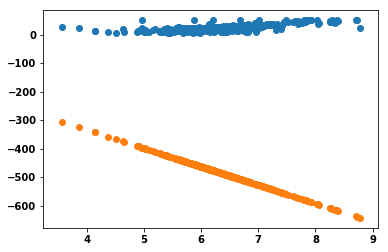

In [92]:
plt.scatter(X, Y)
plt.scatter(X, [get_price(k,b, x)for x in X])

### Part 4 Choose 1 - 2 books to keep reading: 

+ SICP, Structure and Interpretation of Computer Programming. 
+ Introduction to Algorithms 
+ Artificial Intelligence A Modern Approach (3rd Edition) 
+ Code Complete 2 
+ Programming Pearls 
+ Deep Learning
+ 黑客与画家
+ 数学之美
+ Fluent Python
+ Hands on Tensorflow
+ Conference: NIPS_ ICML_ ICLR_ ACL_ AAAI

> most books you may find in our github: https://github.com/Computing-Intelligence/References

## Part 5-1: review machine learning

1. Why do we use Derivative / Gredient to fit a target function?¶

Ans: 使用导数的方式可以更快的找到函数最优解的方向，可以更快的找到最优解的方向

2. In the words 'Gredient Descent', what's the Gredient and what's the Descent?¶

Ans: Gredient是指导数的值， Descent是指倒数值的下降， 可以找到原方程的最优解


3. What's the advantages of the 3rd gradient descent method compared to the previous methods?

Ans: 使用Gredient Descent的方法，可以通过导数的值预先判断最优解的方向。从而更快的找到最优解

4. Using the simple words to describe: What's the machine leanring.¶

Ans: 使用大量数据训练出可以描述问题的数学方程

### Part 5: Answer following questions: 

1. Why do we need dynamic programming? What's the difference of dynamic programming and previous talked `search` problme? 

In [ ]:
动态编程通过不断查询已经计算的部分解来大大提升运算效率。 动态编程是为了提升运算效率，搜索问题是为了计算路径。
可以使用动态编程的方式提升搜索问题的效率

2. Why do we still need dynamic programming? Why not we train a machine learning to fit a function which could get the `right` answer based on inputs?

In [ ]:
机器学习需要大量的数据和合适的数据模型来拟合函数， 而且通过机器学习得到的往往无法达到精确。 而这个问题可以通过递归加动态编程得出方便准确的解

3. Can you catch up at least 3 problems which could solved by Dynamic Programming? 

In [ ]:
路径搜索， 图搜索，树搜索

4. Can you catch up at least 3 problems wich could sloved by Edit Distance? 

In [ ]:
词汇相似度， 文字纠错，相似词推荐

5. Please summarize the three main features of Dynamic Programming, and make a concise explain for each feature. 

In [ ]:
存在重复的子问题：要解决的问题存在重复的子问题
存储重复的问题的解： 将重复的子问题的解存储，避免重复计算，提高效率
解析方案： 由于问题比较复杂，需要最后答案进行解析，得出直观的答案

6. What's the disadvantages of Dynamic Programming? (You may need search by yourself in Internet)


In [ ]:
使用dict或者cache存储会增加内存的使用。 动态编程往往和递归结合，也会增加内存负担

## Part 6 Preparation of Project-01

1. Using python Flask or Bottle to finish your first simple web app:
> https://bottlepy.org/

2. Learn what's the SQL, and try some simple SQL operations:
> https://www.w3schools.com/sql/sql_intro.asp

3. Learn what's the HTML ( *ONLY* need to know the basic things)
> https://getbootstrap.com/; https://www.w3schools.com/html/

### (Optinal) Finish the k-person-salesman problem:

In [7]:
import random
import matplotlib.pylab as plt

In [8]:
latitudes = [random.randint(-100, 100) for _ in range(20)]
longitude = [random.randint(-100, 100) for _ in range(20)]

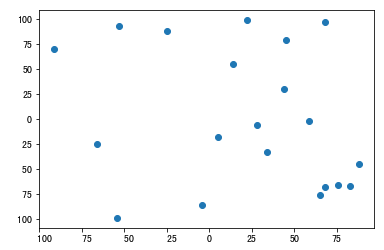

In [9]:
plt.scatter(latitudes, longitude)

给定一个初始点 𝑃, 已经 𝑘个车辆，如何从该点出发，经这 k 个车辆经过所以的点全部一次，而且所走过的路程最短?

例如：

In [14]:
chosen_p = (-50, 10)
chosen_p2 = (1, 30)
chosen_p3 = (99, 15)

In [4]:
import matplotlib.pyplot as plt

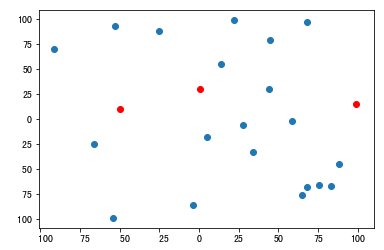

In [15]:
plt.scatter(latitudes, longitude)
plt.scatter([chosen_p[0]], [chosen_p[1]], color='r')
plt.scatter([chosen_p2[0]], [chosen_p2[1]], color='r')
plt.scatter([chosen_p3[0]], [chosen_p3[1]], color='r')

shuro